In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor, BaggingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
train = pd.read_csv("Train.csv")
train.head()

,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,BeatsPerMinute
0,0.513080,-7.811659,0.071013,0.064564,0.109495,0.316042,0.736929,328639.3188,0.556200,117.092439
1,0.775393,-6.819409,0.023500,0.510599,0.187498,0.024361,0.259488,271967.9826,0.410533,122.002279
2,0.636408,-19.782248,0.063451,0.427861,0.002226,0.024300,0.054848,186147.0029,0.533333,149.130616
3,0.232190,-14.957299,0.023500,0.076268,0.000001,0.228454,0.744650,321734.9723,0.658533,95.832178
4,0.758564,-4.715966,0.023500,0.263551,0.414794,0.197167,0.966592,179973.3982,0.230467,125.696263


In [3]:
train.shape

(14633, 10)

In [4]:
train.isnull().sum()

RhythmScore                  0
AudioLoudness                0
VocalContent                 0
AcousticQuality              0
InstrumentalScore            0
LivePerformanceLikelihood    0
MoodScore                    0
TrackDurationMs              0
Energy                       0
BeatsPerMinute               0
dtype: int64

In [5]:
train.duplicated().sum()

0

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14633 entries, 0 to 14632
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   RhythmScore                14633 non-null  float64
 1   AudioLoudness              14633 non-null  float64
 2   VocalContent               14633 non-null  float64
 3   AcousticQuality            14633 non-null  float64
 4   InstrumentalScore          14633 non-null  float64
 5   LivePerformanceLikelihood  14633 non-null  float64
 6   MoodScore                  14633 non-null  float64
 7   TrackDurationMs            14633 non-null  float64
 8   Energy                     14633 non-null  float64
 9   BeatsPerMinute             14633 non-null  float64
dtypes: float64(10)
memory usage: 1.1 MB


In [7]:
test = pd.read_csv("Test.csv")
test.head()

,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,BeatsPerMinute
0,0.773949,-6.377051,0.066823,0.000005,0.063230,0.200380,0.442238,194124.24330,0.205267,NaN
1,0.517672,-13.491908,0.148546,0.000005,0.341291,0.242906,0.714116,243899.92570,0.839800,NaN
2,0.707310,-11.806614,0.076194,0.496764,0.230045,0.076176,0.600724,220769.05740,0.014267,NaN
3,0.735896,-8.554334,0.023500,0.133002,0.000001,0.412421,0.437760,91735.48906,0.250200,NaN
4,0.479114,-11.522295,0.043153,0.000005,0.000001,0.336359,0.443450,240778.00310,0.575800,NaN


In [8]:
test.shape

(300, 10)

In [9]:
test.isnull().sum()

RhythmScore                    0
AudioLoudness                  0
VocalContent                   0
AcousticQuality                0
InstrumentalScore              0
LivePerformanceLikelihood      0
MoodScore                      0
TrackDurationMs                0
Energy                         0
BeatsPerMinute               300
dtype: int64

In [10]:
test.duplicated().sum()

0

<Axes: ylabel='BeatsPerMinute'>

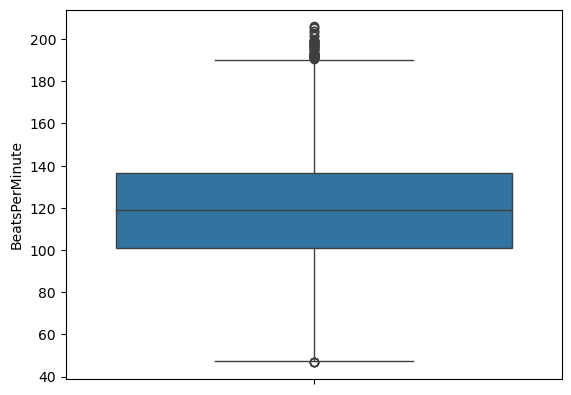

In [11]:
sns.boxplot(train['BeatsPerMinute'])

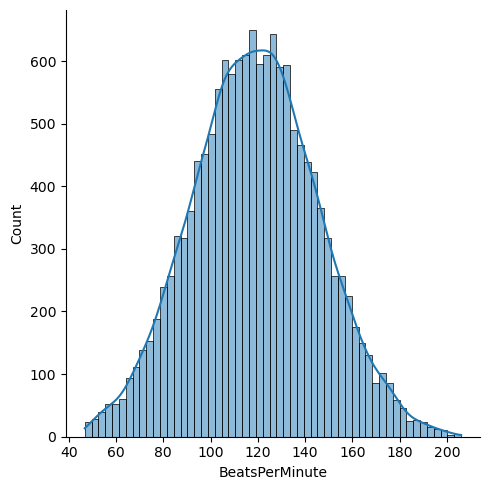

In [12]:
sns.displot(train['BeatsPerMinute'], kde = True)

In [13]:
combined = pd.concat([train, test], axis = 0)
combined.shape

(14933, 10)

In [17]:
X = combined.drop(columns=['BeatsPerMinute'])
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X_scaled.values, i) for i in range(X_scaled.shape[1])]
print(vif_data.sort_values('VIF', ascending=False))

                     feature       VIF
8                     Energy  1.423872
3            AcousticQuality  1.170680
5  LivePerformanceLikelihood  1.130476
6                  MoodScore  1.061563
1              AudioLoudness  1.032349
0                RhythmScore  1.031643
7            TrackDurationMs  1.008907
2               VocalContent  1.000880
4          InstrumentalScore  1.000714


In [19]:
correlation_matrix = combined.corr()
target_corr = correlation_matrix["BeatsPerMinute"].sort_values(ascending=False)
print(target_corr)

BeatsPerMinute               1.000000
LivePerformanceLikelihood    0.010349
TrackDurationMs              0.008666
AudioLoudness                0.006960
AcousticQuality              0.006632
MoodScore                    0.005445
RhythmScore                 -0.000807
VocalContent                -0.003807
InstrumentalScore           -0.006639
Energy                      -0.008552
Name: BeatsPerMinute, dtype: float64


In [23]:
combined = combined.drop(['Energy', 'InstrumentalScore', 'VocalContent', 'RhythmScore'], axis = 1)

In [25]:
newtrain = combined.iloc[0:14633,:]
newtrain.shape

(14633, 6)

In [27]:
newtest = combined.iloc[14633:, :]
newtest.shape

(300, 6)

In [29]:
newtest = newtest.drop('BeatsPerMinute', axis = 1)

In [31]:
X = newtrain.drop(columns=['BeatsPerMinute'])
y = newtrain['BeatsPerMinute']

In [33]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [37]:
models = {'Linear Regression': LinearRegression(), 'Random Forest': RandomForestRegressor(),
         'Bagging': BaggingRegressor(), 'Extra Tree': ExtraTreesRegressor(), 'LightGBM': LGBMRegressor(),
         'Gradient Boosting': GradientBoostingRegressor(), 'Adaboost': AdaBoostRegressor(),
         'XGB': XGBRegressor()}

In [39]:
def evaluate_models(X_train, X_test, y_train, y_test, models):
    results = {}
    for name, model in models.items():
        predictions = model.fit(X_train, y_train).predict(X_test)
        rmse = r2_score(y_test, predictions)
        results[name] = rmse
    return results

In [41]:
results = evaluate_models(X_train, X_test, y_train, y_test, models)

C:\Users\ahpat\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\ahpat\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000148 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 11706, number of used features: 5
[LightGBM] [Info] Start training from score 118.982873


In [42]:
best_model_name = max(results, key = results.get)
best_model = models[best_model_name]

In [43]:
print(f"best model is {best_model_name} with r2_score {results[best_model_name]}")

best model is Linear Regression with r2_score -3.7324274817285286e-05


In [44]:
x_train = newtrain.drop('BeatsPerMinute', axis = 1)
y_train = newtrain['BeatsPerMinute']
x_test = newtest
y_pred = best_model.fit(x_train, y_train).predict(x_test)

In [45]:
solution = pd.DataFrame({'BeatsPerMinute' : y_pred})
solution.head()

,BeatsPerMinute
0,118.643310
1,118.784773
2,118.728584
3,118.736420
4,118.882292


In [51]:
solution.to_csv('Solution.csv', index = False)

In [53]:
from sklearn.linear_model import Lasso, Ridge
lasso = Lasso()
ridge = Ridge()

y_pred = lasso.fit(x_train, y_train).predict(x_test)
solution = pd.DataFrame({'BeatsPerMinute' : y_pred})
solution.to_csv('Final Solution.csv', index = False)

y_pred = ridge.fit(x_train, y_train).predict(x_test)
solution = pd.DataFrame({'BeatsPerMinute' : y_pred})
solution.to_csv('Ridge.csv', index = False)